In [2]:
#!pip install scikit-learn

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans

데이터 생성

In [5]:
df = pd.DataFrame(columns=['x', 'y'])
df.loc[0] = [2, 3]
df.loc[1] = [2, 11]
df.loc[2] = [2, 18]
df.loc[3] = [4, 5]
df.loc[4] = [4, 7]
df.loc[5] = [5, 3]
df.loc[6] = [5, 15]
df.loc[7] = [6, 6]
df.loc[8] = [6, 8]
df.loc[9] = [6, 9]
df.loc[10] = [7, 2]
df.loc[11] = [7, 4]
df.loc[12] = [7, 5]
df.loc[13] = [7, 17]
df.loc[14] = [7, 18]
df.loc[15] = [8, 5]
df.loc[16] = [8, 4]
df.loc[17] = [9, 10]
df.loc[18] = [9, 11]
df.loc[19] = [9, 15]
df.loc[20] = [9, 19]
df.loc[21] = [10, 5]
df.loc[22] = [10, 8]
df.loc[23] = [10, 18]
df.loc[24] = [12, 6]
df.loc[25] = [13, 5]
df.loc[26] = [14, 11]
df.loc[27] = [15, 6]
df.loc[28] = [15, 18]
df.loc[29] = [18, 12]
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


In [7]:
df = pd.read_csv('./data/cluster.csv')
df

,x,y
0,2,3
1,2,11
2,2,18
3,4,5
4,4,7
5,5,3
6,5,15
7,6,6
8,6,8
9,6,9


In [12]:
print(df.index)
print(list(df.index))

print('='*50)
print(df.columns)

print('='*50)
print(type(df.values))
points = df.values
print(points)

RangeIndex(start=0, stop=30, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
Index(['x', 'y'], dtype='object')
<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


데이터 시각화

In [13]:
import matplotlib as mpl
plt.rcParams['font.size'] = 15                     # 글꼴 크기
plt.rcParams['font.family'] = 'NanumGothicCoding'  # 글꼴 이름
mpl.rcParams['axes.unicode_minus'] = False         # 음수 데이터의 '-'가 깨지지 않게 한다.

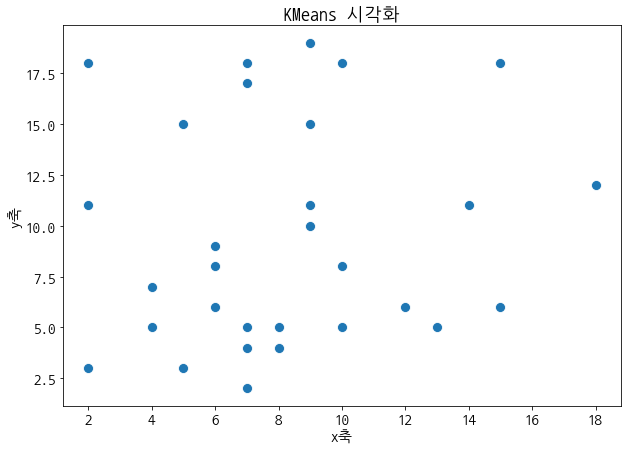

In [20]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

KMeans 알고리즘을 이용해서 Cluster 생성

In [21]:
kmeans = KMeans(n_clusters=4).fit(points)

In [25]:
print(kmeans.cluster_centers_) # 중심 위치를 얻어옴

[[ 5.53846154  5.53846154]
 [ 7.         17.14285714]
 [11.14285714  7.28571429]
 [15.66666667 13.66666667]]


In [26]:
print(kmeans.labels_) # KMeans() 메소드로 계산된 Cluseter를 얻어옴

[0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 2 2 1 1 2 2 1 2 2 3 2 3 3]


df 데이터프레임에 cluster라는 열을 추가하고 군집화된 결과를 넣어줌

In [29]:
df['군집화'] = kmeans.labels_
df

,x,y,군집화
0,2,3,0
1,2,11,0
2,2,18,1
3,4,5,0
4,4,7,0
5,5,3,0
6,5,15,1
7,6,6,0
8,6,8,0
9,6,9,0


In [31]:
df.to_csv('./output/save.csv')

Clustering 된 결과 시각화

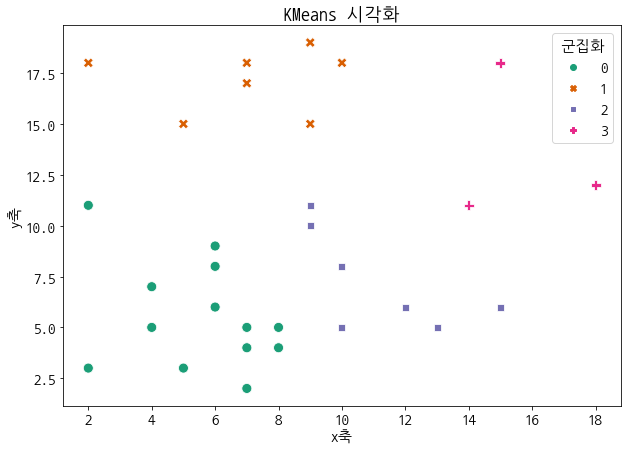

In [36]:
plt.figure(figsize=[10,7])
sns.scatterplot(data=df, x='x', y='y', s=100, 
                hue='군집화', palette='Dark2', style='군집화')
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()